# 平滑化スプライン

\begin{align*}
    {\rm RSS} (f, \lambda) = \sum_{i=1}^N (y_i - f(x_i) )^2 + \lambda \int f^{\prime\prime}(t)^2 dt
\end{align*}

- $\lambda=0$: $f$ はデータを補間する任意の関数。
- $\lambda=\infty$: $f$ は最小二乗解。

\begin{align*}
\cfrac{\partial}{\partial a} \sum_{i=1}^N (y_i - a - bx_i)^2
=& - \sum_{i=1}^N 2(y_i - a - bx_i)
= 2aN - 2\sum_{i=1}^N (y_i - bx_i) \\
\cfrac{\partial}{\partial b} \sum_{i=1}^N (y_i - a - bx_i)^2
=& - \sum_{i=1}^N 2(y_i-a-bx_i)x_i
= 2b \sum_{i=1}^N x_i^2 - 2\sum_{i=1}^N (y_i - a)x_i \\
\therefore\qquad
a =& \cfrac{1}{N} \sum_{i=1}^N (y_i - b x_i)
= \bar{y} - b\bar{x} \\
b{\sum_{i=1}^N x_i^2} =& {\sum_{i=1}^N(y_i - a)x_i}
= {\sum_{i=1}^N \left(y_i - \bar{y} + b\bar{x}\right)x_i}
= {\sum_{i=1}^N x_iy_i - N\bar{x}\bar{y} + Nb\bar{x}^2} \\
\therefore\qquad
b =& \cfrac{N^{-1}\sum_{i=1}^Nx_iy_i - \bar{x}\bar{y}}{N^{-1}\sum_{i=1}^Nx_i^2 - \bar{x}^2}
= \cfrac{{\rm Cov}(x,y)}{\mathbb{V}[x]}
\end{align*}

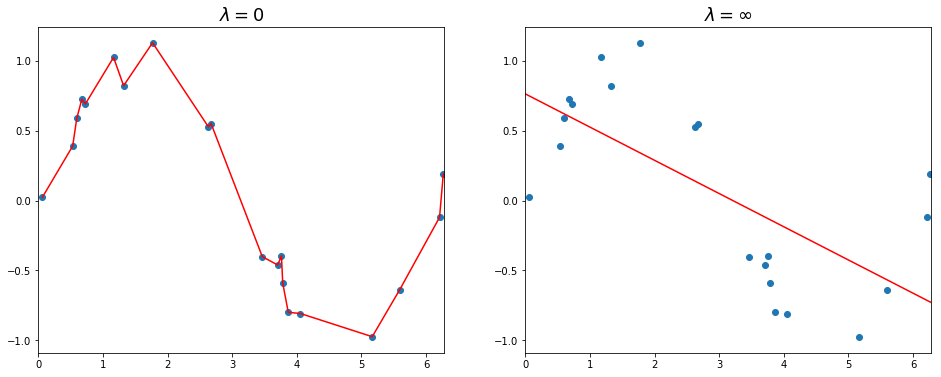

In [2]:
# case of lambda = 0 and lambda = infty 

import numpy as np;
import matplotlib.pyplot as plt;

# data creation
N = 20;
sigma = 0.1;
X = 2*np.pi*np.random.rand (N,1);
Y = np.sin (X) + sigma*np.random.normal (size=(N,1));

# lambda = 0
fig = plt.figure (figsize=(16,6));
ax = fig.add_subplot(121);
ax.scatter (X[:,0],Y[:,0]);
ax.set_xlim ([0, 2*np.pi]);
values = list(zip(X,Y));
data = np.array (values, dtype=[('a',float),('b',float)]);
sorted_data = np.sort (data, order=['a','b']);
sorted_X = [];
sorted_Y = [];
for sd in sorted_data:
    sorted_X.append (sd[0]);
    sorted_Y.append (sd[1]);
ax.plot (sorted_X[:], sorted_Y[:], 'r');
ax.set_title ("$\lambda=0$", fontsize=18)

# lambda = infty
ax = fig.add_subplot(122)
ax.scatter (X[:,0],Y[:,0]);
ax.set_xlim ([0, 2*np.pi]);
b = np.cov(X.T, Y.T)[0,1] / np.var (X);
a = np.mean(Y) - b*np.mean(X);
xs = np.linspace (0,2*np.pi);
ax.plot (xs, a+xs*b, 'r');
ax.set_title ("$\lambda=\infty$", fontsize=18);


\begin{align*}
    &N_1(x) = 1, N_2(x) = x, N_k(x) = d_{k-2}(x) - d_{N-1}(x) \quad (k \geq 3) \\
    &d_k (x) = \cfrac{(x - x_k)_+^3 - (x-x_{N})_+^3}{x_N - x_k}
    = \left\{
        \begin{matrix}
            0 & (x \leq x_k) \\
            \cfrac{(x-x_k)^3}{x_N-x_k} & (x_k < x < x_N) \\
            3x^2 - 3(x_N+x_k)x + (x_N^2+x_Nx_k + x_k^2) & (x_N \leq x)
        \end{matrix}
        \right. \\
    &d_{k-2} (x_j) = \left\{ \begin{matrix}
        0 & (j \leq k-2) \\
        \cfrac{(x_j - x_{k-2})^3}{x_N - x_{k-2}} & (j > k-2)
        \end{matrix} \right. \\
    &d_{N-1} (x_j) = \left\{\begin{matrix}
        0 & (j \leq N-1) \\
        (x_{N} - x_{N-1})^2 & (j = N)
        \end{matrix} \right. \\
    &N_k (x_j)
        = \left\{ \begin{matrix}
            0 & (j \leq k-2) \\
            \cfrac{(x_j-x_{k-2})^3}{x_N - x_{k-2}} & (k-2 \leq j \leq N-1) \\
            (x_N - x_{k-2})^2 - (x_N - x_{N-1})^2 & (j = N)
        \end{matrix} \right. (k \geq 3)
\end{align*}

\begin{align*}
    \mathbf{N}
    =& \left( \begin{matrix}
            N_1(x_1) & N_2(x_1) & N_3(x_1) & N_4(x_1) & \cdots & N_N(x_1) \\
            N_1(x_2) & N_2(x_2) & N_3(x_2) & N_4(x_2) & \cdots & N_N(x_2) \\
            N_1(x_3) & N_2(x_3) & N_3(x_3) & N_4(x_3) & \cdots & N_N(x_3) \\
            \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
            N_1(x_{N-1}) & N_2(x_{N-1}) & N_3(x_{N-1}) & N_4(x_{N-1}) & \cdots & N_N(x_{N-1}) \\
            N_1(x_N) & N_2(x_N) & N_3(x_N) & N_4(x_N) & \cdots & N_N(x_N)
        \end{matrix} \right) \\
    =& \left( \begin{matrix}
            1 & x_1 & 0 & 0 & \cdots & 0 \\
            1 & x_2 & \cfrac{(x_2-x_1)^3}{x_N-x_1} & 0 & \cdots & 0 \\
            1 & x_3 & \cfrac{(x_3-x_1)^3}{x_N-x_1} & \cfrac{(x_3-x_2)^3}{x_N-x_2} & \cdots & 0  \\
            \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
            1 & x_{N-1} & \cfrac{(x_{N-1}-x_1)^3}{x_N-x_1} & \cfrac{(x_{N-1}-x_2)^3}{x_N-x_2} & \cdots & \cfrac{(x_{N-1}-x_{N-2})^3}{x_N-x_{N-2}} \\
            1 & x_N & N_3(x_N) & N_4(x_N) & \cdots & N_N(x_N)
        \end{matrix}\right)
\end{align*}

\begin{align*}
    &N_1^{\prime\prime}(x) = 0,
    N_2^{\prime\prime}(x) = 0, \\
    &d_k^{\prime\prime}(x) = \left\{ \begin{matrix}
        0 & (x \leq x_k) \\
        \cfrac{6(x-x_k)}{x_N-x_k} & (x_k < x < x_N) \\
        6 & (x_N \leq x)
    \end{matrix} \right. \\
    & N^{\prime\prime}_k(x) 
        = d_{k-2}^{\prime\prime}(x) - d_{N-1}^{\prime\prime}(x)
        = \left\{ \begin{matrix}
                0 & (x \leq x_{k-2}, x_N \leq x) \\
                \cfrac{6(x-x_{k-2})}{x_N - x_{k-2}} & (x_{k-2} < x \leq x_{N-1}) \\
                \cfrac{6(x-x_{k-2})}{x_N-x_{k-2}} - \cfrac{6(x-x_{N-1})}{x_N-x_{N-1}} & (x_{N-1} < x < x_N)
            \end{matrix} \right.
\end{align*}



\begin{align*}
    \int N_j^{\prime\prime}(t) N_k^{\prime\prime}(t) dt =& \int N_k^{\prime\prime}(t) N_j^{\prime\prime} (t) dt = 0
        \qquad (j=1,2) \\
    \int N_j^{\prime\prime}(t)^2 dt 
        =& 36\int_{x_{j-2}}^{x_{N-1}} \cfrac{(t-x_{j-2})^2}{(x_N - x_{j-2})^2} dt 
            + 36\int_{x_{N-1}}^{x_N} \left\{\cfrac{t-x_{j-2}}{x_N-x_{j-2}} - \cfrac{t-x_{N-1}}{x_N-x_{N-1}} \right\}^2 dt \\
        =& 36\int_{x_{j-2}}^{x_N} \cfrac{(t-x_{j-2})^2}{(t_N-x_{j-2})^2} dt
            + 36 \int_{x_{N-1}}^{x_N} \left\{
                -\cfrac{2(t-x_{j-2})(t-x_{N-1})}{(x_N-x_{j-2})(x_N-x_{N-1})}
                +\cfrac{(t-x_{N-1})^2}{(x_N-x_{N-1})}
            \right\} dt \\
        =& 12 \left[\cfrac{(t-x_{j-2})^3}{(x_N - x_{j-2})^2} \right]_{x_{j-2}}^{x_N}
            - \cfrac{12}{(x_N-x_{j-2})(x_N-x_{N-1})} \left[2t^3 - 3(x_{j-2}+x_{N-1})t^2 + 6x_{j-2}x_{N-1}t \right]_{x_{N-1}}^{x_N}
            + 12 \left[\cfrac{(t-x_{N-1})^3}{(x_N-x_{N-1})^2} \right]_{x_{N-1}}^{x_N} \\
        =& 12(x_N - x_{j-2}) + 12(x_N - x_{N-1})
            - \cfrac{12}{x_N-x_{j-2}} \left\{
                2(x_N^2 + x_Nx_{N-1} + x_{N-1}^2)
                - 3(x_{j-2} + x_{N-1}) (x_N + x_{N-1})
                + 6x_{j-2} x_{N-1}
            \right\} \\
        =& 12(x_N - x_{j-2}) + 12(x_N - x_{N-1})
            - \cfrac{12}{x_N - x_{j-2}} \left\{
                2x_N^2 - x_{N-1}^2 - x_{N-1}x_N + 3x_{j-2}x_{N-1} - 3x_{j-2}x_N
            \right\} \\
        =& \cfrac{12}{x_N-x_{j-2}} \left\{
                (x_N^2 - 2x_{j-2}x_N + x_{j-2}^2)
                + (x_N^2 - 2x_{N-1}x_N + x_{N-1}^2)
                - (2x_N^2 - x_{N-1}^2 - x_{N-1}x_N + 3x_{j-2}x_{N-1} - 3x_{j-2}x_N)
            \right\} \\
        =& \cfrac{12}{x_N-x_{j-2}} \left\{
                x_{j-2}^2 + 2x_{N-1}^2
                - 3x_{j-2}x_{N-1} + x_{j-2}x_N - x_{N-1}x_N
            \right\} \\
        =& \cfrac{12}{x_N-x_{j-2}}
            (x_{j-2} - x_{N-1})(x_{j-2} - 2x_{N-1} + x_N)
\end{align*}


\begin{align*}
    \int N_j^{\prime\prime}(t) N_k^{\prime\prime} (t) dt
    =& 36\int_{x_{k-2}}^{x_{N-1}} \cfrac{(t-x_{j-2})(t-x_{k-2})}{(x_N-x_{j-2})(x_N-x_{k-2})} dt
        + 36\int_{x_{N-1}}^{x_N} 
            \left(\cfrac{t-x_{j-2}}{x_N-x_{j-2}} - \cfrac{t-x_{N-1}}{x_N-x_{N-1}}\right)
            \left(\cfrac{t-x_{k-2}}{x_N-x_{k-2}} - \cfrac{t-x_{N-1}}{x_N-x_{N-1}}\right)
            dt \\
    =& 36 \int_{x_{k-2}}^{x_N} \cfrac{(t-x_{j-2})(t-x_{k-2})}{(x_N-x_{j-2})(x_N-x_{k-2})} dt
        + 36 \int_{x_{N-1}}^{x_N} 
            \left\{
                - \left(\cfrac{2t-x_{j-2}-x_{k-2}}{2x_N-x_{j-2}-x_{k-2}}\right)\left( \cfrac{t-x_{N-1}}{x_N-x_{N-1}} \right)
                + \left(\cfrac{t-x_{N-1}}{x_N-x_{N-1}}\right)^2
            \right\} dt \\
    =& \cfrac{12}{(x_N-x_{j-2})(x_N-x_{k-2})} \left[ 2t^3 - 3(x_{j-2}+x_{k-2})t^2 + 6x_{j-2}x_{k-2}t \right]_{x_{k-2}}^{x_N}
        - \cfrac{12}{(2x_N-x_{j-2}-x_{k-2})(x_N-x_{N-1})} \left[ 4t^3 - 3(x_{j-2}+x_{k-2}+x_{N-1})t^2 + 6x_{N-1}(x_{j-2}+x_{k-2})t \right]_{x_{N-1}}^{x_N}
        + 12 \left[ \cfrac{(t-x_{N-1})^3}{(x_N-x_{N-1})^2} \right]_{x_{N-1}}^{x_N} \\
    =& \cfrac{12}{x_N-x_{j-2}} \left\{
            2(x_N^2+x_{k-2}x_N+x_{k-2}^2)
            -3 (x_{j-2}+x_{k-2})(x_N + x_{k-2})
            +6 x_{j-2}x_{k-2}
        \right\} 
        + 12 (x_N-x_{N-1})
        - \cfrac{12}{2x_N-x_{j-2}-x_{k-2}} \left\{
            4(x_N^2 + x_{N-1}x_N + x_{N-1}^2)
            -3(x_{j-2} + x_{k-2} + x_{N-1})(x_N + x_{N-1})
            +6x_{N-1}(x_{j-2}+x_{k-2})
        \right\}
        \quad(2 \leq j < k)
\end{align*}

1,0
2,0
4,0
6,0
7,0
8,0
9,0
10,0
11,0
12,0
13,0
14,0
15,0
16,0
18,0
19,0
23,0
24,0
26,0
28,0
29,0
30,0
31,0
34,0
36,0
37,0
38,0
39,0
40,0
42,0
43,0
44,0
45,0
46,0
47,0
48,0
49,0
50,0
51,0
52,0
53,0
54,0
55,0
56,0
57,0
58,0
59,0
60,0
61,0
62,0
63,0
64,0
65,0
66,0
67,0
68,0
70,0
71,0
72,0
73,0
74,0
75,0
76,0
77,0
80,0
81,0
82,0
83,0
85,0
86,0
87,0
88,0
89,0
90,0
91,0
92,0
93,0
94,0
95,0
96,0
97,0
98,0
99,0
100,0
101,0
102,0
103,0
104,0
105,0
106,0
107,0
108,0
109,0
110,0
111,0
112,0
113,0
114,0
115,0
116,0
117,0
118,0
119,0
120,0
121,0
122,0
123,0
124,0
125,0
126,0
127,0
2,1
3,1
5,1
6,1
9,1
12,1
13,1
14,1
15,1
16,1
18,1
20,1
21,1
22,1
23,1
24,1
25,1
26,1
28,1
29,1
30,1
33,1
34,1
35,1
36,1
37,1
38,1
39,1
40,1
41,1
42,1
43,1
45,1
46,1
47,1
48,1
49,1
52,1
53,1
54,1
55,1
56,1
57,1
58,1
59,1
60,1
61,1
62,1
63,1
64,1
65,1
66,1
67,1
69,1
70,1
71,1
72,1
73,1
74,1
76,1
77,1
78,1
79,1
80,1
81,1
82,1
83,1
84,1
85,1
86,1
87,1
88,1
89,1
90,1
91,1
92,1
93,1
94,1
95,1
96,1
97,1
98,1
99,1
100,1
101,1
10

54,16
55,16
56,16
57,16
58,16
59,16
60,16
61,16
62,16
63,16
64,16
65,16
66,16
68,16
69,16
70,16
71,16
72,16
73,16
74,16
75,16
76,16
78,16
79,16
80,16
81,16
82,16
83,16
84,16
85,16
86,16
87,16
88,16
89,16
90,16
91,16
92,16
93,16
94,16
95,16
96,16
97,16
98,16
99,16
100,16
101,16
102,16
103,16
104,16
105,16
106,16
107,16
108,16
109,16
110,16
111,16
112,16
113,16
114,16
115,16
116,16
117,16
118,16
120,16
122,16
123,16
124,16
125,16
126,16
127,16
18,17
20,17
23,17
25,17
26,17
27,17
28,17
29,17
30,17
31,17
33,17
34,17
35,17
36,17
37,17
38,17
39,17
40,17
41,17
42,17
43,17
44,17
45,17
46,17
47,17
48,17
49,17
52,17
53,17
54,17
55,17
57,17
59,17
60,17
61,17
62,17
63,17
65,17
66,17
68,17
69,17
70,17
71,17
72,17
73,17
75,17
76,17
77,17
78,17
79,17
80,17
81,17
82,17
83,17
84,17
85,17
86,17
87,17
88,17
89,17
90,17
91,17
92,17
93,17
94,17
95,17
96,17
97,17
98,17
99,17
100,17
101,17
102,17
103,17
104,17
105,17
106,17
107,17
108,17
109,17
110,17
111,17
112,17
113,17
114,17
115,17
116,17
117,17
118,17
1

78,44
79,44
80,44
81,44
82,44
83,44
84,44
86,44
87,44
88,44
89,44
90,44
91,44
92,44
93,44
94,44
95,44
96,44
98,44
100,44
101,44
102,44
104,44
105,44
107,44
108,44
109,44
110,44
111,44
112,44
113,44
114,44
115,44
116,44
118,44
119,44
121,44
122,44
123,44
124,44
126,44
127,44
46,45
47,45
48,45
50,45
51,45
52,45
54,45
55,45
56,45
57,45
58,45
59,45
60,45
61,45
62,45
63,45
64,45
65,45
66,45
67,45
68,45
69,45
70,45
71,45
72,45
73,45
74,45
75,45
76,45
78,45
79,45
81,45
82,45
83,45
84,45
85,45
86,45
87,45
88,45
89,45
90,45
91,45
92,45
93,45
94,45
95,45
96,45
97,45
98,45
99,45
100,45
101,45
102,45
103,45
104,45
105,45
106,45
107,45
108,45
109,45
110,45
111,45
112,45
113,45
114,45
115,45
116,45
117,45
118,45
119,45
121,45
123,45
125,45
126,45
127,45
47,46
48,46
50,46
51,46
52,46
53,46
54,46
55,46
56,46
57,46
58,46
59,46
60,46
61,46
62,46
64,46
65,46
66,46
67,46
70,46
71,46
72,46
73,46
74,46
75,46
76,46
79,46
80,46
81,46
82,46
83,46
84,46
85,46
86,46
87,46
88,46
89,46
90,46
92,46
93,46
95,46
96,4

92,88
93,88
94,88
95,88
96,88
97,88
98,88
99,88
100,88
102,88
104,88
105,88
106,88
107,88
108,88
109,88
111,88
112,88
113,88
114,88
115,88
116,88
117,88
118,88
119,88
120,88
121,88
122,88
123,88
124,88
125,88
126,88
127,88
90,89
91,89
92,89
93,89
94,89
95,89
96,89
97,89
98,89
99,89
100,89
101,89
102,89
103,89
105,89
106,89
107,89
108,89
109,89
110,89
111,89
112,89
113,89
114,89
115,89
116,89
117,89
118,89
119,89
120,89
121,89
123,89
124,89
125,89
126,89
127,89
91,90
92,90
93,90
94,90
95,90
96,90
97,90
99,90
100,90
101,90
102,90
103,90
104,90
105,90
106,90
107,90
108,90
109,90
110,90
111,90
112,90
113,90
114,90
115,90
116,90
117,90
118,90
119,90
120,90
121,90
122,90
123,90
124,90
125,90
126,90
127,90
92,91
93,91
94,91
95,91
96,91
97,91
98,91
99,91
100,91
101,91
102,91
103,91
104,91
105,91
106,91
107,91
108,91
109,91
110,91
111,91
112,91
113,91
114,91
115,91
116,91
117,91
118,91
119,91
120,91
121,91
122,91
123,91
124,91
125,91
127,91
93,92
94,92
95,92
96,92
97,92
98,92
99,92
100,92
101,9

/usr/local/lib/python3.7/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


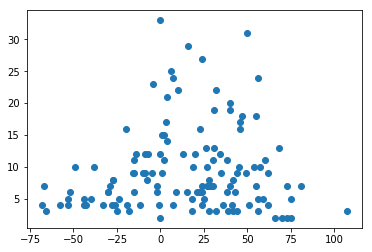

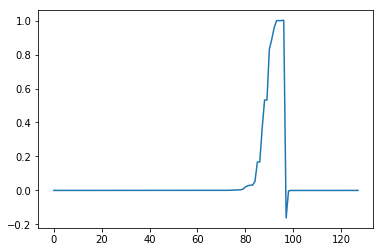

In [66]:
import csv
import numpy as np;

# get data

file = open("../data/LAozone.csv", "r", encoding="utf_8", errors="", newline="" )
f = csv.reader(file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
header = next(f);
train_data = np.array ([[float (x) for x in row[:]] for row in f]);
train_Y = train_data[0:128,0];
train_X = train_data[0:128,6];

K = len(np.unique(train_Y));
N, = train_X.shape;


import matplotlib.pyplot as plt;

plt.scatter(train_X[:], train_Y[:])

# sorting by ascended order
values = list(zip(train_X,train_Y));
data = np.array (values, dtype=[('a',float),('b',float)]);
sorted_data = np.sort (data, order=['a','b']);
sorted_X = [];
sorted_Y = [];
for sd in sorted_data:
    sorted_X.append (sd[0]);
    sorted_Y.append (sd[1]);


def matrix_N (col, row):
    # param col means  column number
    # param row means  row number
    if row+1==1:
        return 1;
    if row+1==2:
        return sorted_X[col];
    if row+1>col+1+1:
        return 0;
    if col+1==N:
        return (sorted_X[N-1]-sorted_X[row-2])**2 - (sorted_X[N-1]-sorted_X[N-2])**2;
    return (sorted_X[col] - sorted_X[row-2])**3 / (sorted_X[N-1] - sorted_X[row-2]);

def matrix_Omega (col, row):
    # param col means column number
    # param row means row number
    if (col+1<=2) or (row+1<=2):
        return 0;
    if (col+1==row+1):
        return 12*(sorted_X[col-2]-sorted_X[N-2])*(sorted_X[col-2]-2*sorted_X[N-2]+sorted_X[N-1]) / (sorted_X[N-1]-sorted_X[col-2]);
    j = row if (row<col) else col;
    k = col if (row<col) else row;
    tmp1_1 = sorted_X[N-1]*sorted_X[N-1]+sorted_X[k-2]*sorted_X[N-1]+sorted_X[k-2]*sorted_X[k-2];
    tmp1_2 = (sorted_X[j-2]+sorted_X[k-2])*(sorted_X[N-1]+sorted_X[k-2]);
    tmp1_3 = sorted_X[j-2]*sorted_X[k-2];
    tmp2 = sorted_X[N-1] - sorted_X[N-2];
    tmp3_1 = sorted_X[N-1]*sorted_X[N-1]+sorted_X[N-1]*sorted_X[N-2]+sorted_X[N-2]*sorted_X[N-2];
    tmp3_2 = (sorted_X[j-2]+sorted_X[k-2]+sorted_X[N-2])*(sorted_X[N-1]+sorted_X[N-2]);
    tmp3_3 = sorted_X[N-2]*(sorted_X[j-2]+sorted_X[k-2]);
    tmp1 = (2*tmp1_1 - 3*tmp1_2 + 6*tmp1_3) / (sorted_X[N-1]-sorted_X[j-2]);
    tmp3 = (4*tmp3_1 - 3*tmp3_2 + 6*tmp3_3) / (2*sorted_X[N-1]-sorted_X[j-2]-sorted_X[k-2]);
    return 12*(tmp1 + tmp2 - tmp3);
    
    
# calcurating matrices
matN = np.zeros ((N,N)); 
for col in range(N):
    for row in range (N):
        matN[col,row] = matrix_N(col, row);

Omega = np.zeros ((N,N));
for col in range (N):
    for row in range(N):
        Omega[col,row] = matrix_Omega (col,row)

lam = 0.00022;
u,s,vh = np.linalg.svd(matN, full_matrices=False);
K = (u.T/s).dot (vh.T).dot(Omega).dot (vh/s).dot (u);
for row in range (N):
    for col in range (row+1,N):
        if K[col,row]!=K[row,col]:
            print ("{},{}".format(col, row))
w, v = np.linalg.eig (K);
w = np.sort (w)[::-1];
plt.figure ();
plt.plot (1.0/(1+lam*w))

In [61]:
import numpy as np;

#  A = np.random.randn (3,2);
#  print (A)
#  u, s, vh = np.linalg.svd(A,full_matrices=False);
#  print (np.allclose (A, np.dot(u*s,vh)))
#  print ((u*s).dot(vh));
a = np.array ([1,3,5,2,4])
print (a);
print (np.sort (a))
print (np.argsort (a))
print (np.sort (a)[::-1])
print (np.argsort (a)[::-1])

[1 3 5 2 4]
[1 2 3 4 5]
[0 3 1 4 2]
[5 4 3 2 1]
[2 4 1 3 0]
